In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import pandas as pd
import random
from datetime import datetime, timedelta

# กำหนด seed เพื่อให้ผลซ้ำได้
random.seed(42)

# ฟังก์ชันสุ่มเวลา
def random_date(start, end):
    return start + timedelta(seconds=random.randint(0, int((end - start).total_seconds())))

# ฟังก์ชันกำหนดเวลายกสินค้าตามเครื่องจักร
def get_picking_time(machine, location):
    base_time = {
        'Stacker Crane 1': random.uniform(15, 45),
        'Stacker Crane 2': random.uniform(15, 45),
        'Conveyor 1': random.uniform(3, 10),
        'Conveyor 2': random.uniform(3, 10),
        'RGV A': random.uniform(5, 20),
        'RGV B': random.uniform(5, 20)
    }[machine]

    # เพิ่มเวลาถ้าอยู่ไกล (Location D)
    location_delay = {'A': 0, 'B': 1, 'C': 2, 'D': 4}[location]
    return base_time + location_delay

# ฟังก์ชันกำหนด stock available ตาม product_id
def get_stock_status(product_id):
    # สินค้า P1001, P1007 ขาดแคลนบ่อยกว่า
    if product_id in ['P1001', 'P1007']:
        return 'No' if random.random() < 0.3 else 'Yes'
    else:
        return 'No' if random.random() < 0.1 else 'Yes'

# สร้างข้อมูลจำลอง 600 rows
data = []
start_date = datetime(2024, 9, 1, 8, 0, 0)
end_date = datetime(2024, 9, 30, 18, 0, 0)

for i in range(600):
    order_id = f"ORD{i+1:03d}"
    product_id = f"P{random.randint(1001, 1020):04d}"

    received = random_date(start_date, end_date)
    pick_delay = get_picking_time(random.choice(['Stacker Crane 1', 'Stacker Crane 2',
                                                 'Conveyor 1', 'Conveyor 2',
                                                 'RGV A', 'RGV B']), random.choice(['A', 'B', 'C', 'D']))
    pick_start = received + timedelta(minutes=pick_delay)
    pick_end = pick_start + timedelta(minutes=5)  # เวลารวมหยิบจริง
    ship = pick_end + timedelta(minutes=random.randint(20, 60))

    location = random.choice(['A', 'B', 'C', 'D'])
    machine_used = random.choice([
        'Stacker Crane 1', 'Stacker Crane 2',
        'Conveyor 1', 'Conveyor 2',
        'RGV A', 'RGV B'
    ])
    quantity = random.randint(1, 20)
    stock_available = get_stock_status(product_id)

    # คำนวณว่าตรงเวลาหรือไม่
    total_processing_time = (ship - received).total_seconds() / 60
    on_time = "Yes" if total_processing_time <= 90 else "No"

    data.append({
        "order_id": order_id,
        "product_id": product_id,
        "timestamp_received": received.strftime("%Y-%m-%d %H:%M:%S"),
        "timestamp_pick_start": pick_start.strftime("%Y-%m-%d %H:%M:%S"),
        "timestamp_pick_end": pick_end.strftime("%Y-%m-%d %H:%M:%S"),
        "timestamp_ship": ship.strftime("%Y-%m-%d %H:%M:%S"),
        "location": location,
        "machine_used": machine_used,
        "quantity": quantity,
        "stock_available": stock_available,
        "on_time_delivery": on_time,
        "picking_time": pick_delay,
        "shipping_time": (ship - pick_end).total_seconds() / 60
    })

# สร้าง DataFrame และบันทึกเป็น CSV
df = pd.DataFrame(data)
df.to_csv("warehouse_operations_data_v2.csv", index=False)

print("✅ สร้างไฟล์ CSV เรียบร้อยแล้ว: warehouse_operations_data_v2.csv")

✅ สร้างไฟล์ CSV เรียบร้อยแล้ว: warehouse_operations_data_v2.csv


In [13]:
import pandas as pd


df = pd.read_csv("warehouse_operations_data_v2.csv")

print("จำนวนแถวและคอลัมน์:", df.shape)
print("\nิ5 แถวแรก:")
print(df.head())
print("\n ประเภทข้อมูลแต่ละฟิลด์:")
print(df.dtypes)
print("\n Missing Values:")
print(df.isnull().sum())

จำนวนแถวและคอลัมน์: (600, 13)

ิ5 แถวแรก:
  order_id product_id   timestamp_received timestamp_pick_start  \
0   ORD001      P1004  2024-09-02 13:08:22  2024-09-02 13:24:13   
1   ORD002      P1020  2024-09-02 14:54:59  2024-09-02 15:05:09   
2   ORD003      P1011  2024-09-06 07:05:00  2024-09-06 07:26:54   
3   ORD004      P1020  2024-09-18 21:20:07  2024-09-18 21:27:18   
4   ORD005      P1012  2024-09-09 05:30:20  2024-09-09 05:41:53   

    timestamp_pick_end       timestamp_ship location     machine_used  \
0  2024-09-02 13:29:13  2024-09-02 13:51:13        A  Stacker Crane 1   
1  2024-09-02 15:10:09  2024-09-02 15:40:09        D       Conveyor 1   
2  2024-09-06 07:31:54  2024-09-06 08:15:54        A            RGV A   
3  2024-09-18 21:32:18  2024-09-18 21:58:18        D       Conveyor 1   
4  2024-09-09 05:46:53  2024-09-09 06:21:53        B       Conveyor 2   

   quantity stock_available on_time_delivery  picking_time  shipping_time  
0         7             Yes             

In [14]:
import pandas as pd

df = pd.read_csv("warehouse_operations_data_v2.csv")

# ตรวจสอบการใช้งานเครื่องจักร
print("\n การใช้งานเครื่องจักร:")
print(df['machine_used'].value_counts())

# หาประสิทธิภาพการส่งตรงเวลา
print("\n อัตราการส่งตรงเวลา:")
print(df['on_time_delivery'].value_counts(normalize=True) * 100)


 การใช้งานเครื่องจักร:
machine_used
Stacker Crane 1    119
Conveyor 2         102
RGV B              102
Stacker Crane 2     95
RGV A               94
Conveyor 1          88
Name: count, dtype: int64

 อัตราการส่งตรงเวลา:
on_time_delivery
Yes    92.0
No      8.0
Name: proportion, dtype: float64


In [10]:
df[['order_id', 'product_id', 'quantity', 'machine_used']]

,order_id,product_id,quantity,machine_used
0,ORD001,P1004,7,Stacker Crane 1
1,ORD002,P1020,9,Conveyor 1
2,ORD003,P1011,10,RGV A
3,ORD004,P1020,15,Conveyor 1
4,ORD005,P1012,13,Conveyor 2
...,...,...,...,...
595,ORD596,P1005,7,RGV B
596,ORD597,P1011,14,Conveyor 1
597,ORD598,P1016,16,Stacker Crane 2
598,ORD599,P1010,1,Conveyor 2


In [42]:
df[df['stock_available'] == 'Yes']


,order_id,product_id,timestamp_received,timestamp_pick_start,timestamp_pick_end,timestamp_ship,location,machine_used,quantity,stock_available,on_time_delivery,picking_time,shipping_time
0,ORD001,P1004,2024-09-02 13:08:22,2024-09-02 13:24:13,2024-09-02 13:29:13,2024-09-02 13:51:13,A,Stacker Crane 1,7,Yes,Yes,15.857388,22.0
1,ORD002,P1020,2024-09-02 14:54:59,2024-09-02 15:05:09,2024-09-02 15:10:09,2024-09-02 15:40:09,D,Conveyor 1,9,Yes,Yes,10.172861,30.0
2,ORD003,P1011,2024-09-06 07:05:00,2024-09-06 07:26:54,2024-09-06 07:31:54,2024-09-06 08:15:54,A,RGV A,10,Yes,Yes,21.901491,44.0
3,ORD004,P1020,2024-09-18 21:20:07,2024-09-18 21:27:18,2024-09-18 21:32:18,2024-09-18 21:58:18,D,Conveyor 1,15,Yes,Yes,7.196880,26.0
4,ORD005,P1012,2024-09-09 05:30:20,2024-09-09 05:41:53,2024-09-09 05:46:53,2024-09-09 06:21:53,B,Conveyor 2,13,Yes,Yes,11.556582,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,ORD595,P1012,2024-09-17 23:42:51,2024-09-17 23:49:29,2024-09-17 23:54:29,2024-09-18 00:20:29,A,Conveyor 2,13,Yes,Yes,6.649050,26.0
596,ORD597,P1011,2024-09-02 03:22:32,2024-09-02 03:36:48,2024-09-02 03:41:48,2024-09-02 04:40:48,A,Conveyor 1,14,Yes,Yes,14.268042,59.0
597,ORD598,P1016,2024-09-06 05:02:21,2024-09-06 05:24:12,2024-09-06 05:29:12,2024-09-06 06:21:12,A,Stacker Crane 2,16,Yes,Yes,21.852039,52.0
598,ORD599,P1010,2024-09-27 23:20:10,2024-09-27 23:27:57,2024-09-27 23:32:57,2024-09-27 23:57:57,A,Conveyor 2,1,Yes,Yes,7.784675,25.0


In [55]:
import pandas as pd

# 1. โหลดข้อมูล CSV ใหม่
df = pd.read_csv("warehouse_operations_data_v2.csv")

# 2. แปลง timestamp เป็น datetime
df['timestamp_received'] = pd.to_datetime(df['timestamp_received'])
df['timestamp_pick_start'] = pd.to_datetime(df['timestamp_pick_start'])
df['timestamp_pick_end'] = pd.to_datetime(df['timestamp_pick_end'])
df['timestamp_ship'] = pd.to_datetime(df['timestamp_ship'])

# 3. คำนวณเวลาบางส่วน (หากยังไม่มี)
df['processing_time'] = (df['timestamp_pick_start'] - df['timestamp_received']).dt.total_seconds() / 60
df['shipping_time'] = (df['timestamp_ship'] - df['timestamp_pick_end']).dt.total_seconds() / 60

avg_picking_time = df['picking_time'].mean()
print(f"\n🕒 เวลาเฉลี่ยในการหยิบสินค้า: {avg_picking_time:.2f} นาที")

on_time_rate = df['on_time_delivery'].value_counts(normalize=True)['Yes'] * 100
print(f"\n📦 อัตราการส่งตรงเวลา: {on_time_rate:.2f}%")

machine_usage = df['machine_used'].value_counts()
print("\n🛠️ การใช้งานเครื่องจักร:")
print(machine_usage)

stock_status = df['stock_available'].value_counts()
print("\n🔍 สถานะสินค้าในสต็อก:")
print(stock_status)

grouped_by_machine = df.groupby('machine_used')['picking_time'].mean().sort_values(ascending=False)
print("\n⏱️ เวลายกเฉลี่ยต่อเครื่องจักร:")
print(grouped_by_machine)

grouped_by_location = df.groupby('location')['picking_time'].mean().sort_values(ascending=False)
print("\n📍 เวลายกเฉลี่ยต่อพื้นที่จัดเก็บ:")
print(grouped_by_location)

product_pick_count = df['product_id'].value_counts()
print("\n📦 จำนวนการหยิบต่อสินค้า:")
print(product_pick_count.head(10))

stock_out_rate = df[df['stock_available'] == 'No']['product_id'].value_counts(normalize=True) * 100
print("\n📉 อัตราสินค้าขาดแคลน (%):")
print(stock_out_rate.head(10))

df['date_received'] = df['timestamp_received'].dt.date
daily_processing_time = df.groupby('date_received')['processing_time'].mean().sort_values(ascending=False)
print("\n📅 เวลารวมกระบวนการต่อวัน:")
print(daily_processing_time.head())

print("\n📌 สรุปข้อมูลเชิงธุรกิจ:")
print(f"- เวลาเฉลี่ยในการหยิบสินค้า: {avg_picking_time:.2f} นาที")
print(f"- อัตราการส่งตรงเวลา: {on_time_rate:.2f}%")
print("- Stacker Crane 1 ถูกใช้งานมากที่สุด")
print("- Product P1001 มักจะหมดสต็อกบ่อยที่สุด")
print("- พื้นที่ D มีเวลายกเฉลี่ยนานที่สุด → ควรตรวจสอบคอขวด")


🕒 เวลาเฉลี่ยในการหยิบสินค้า: 18.15 นาที

📦 อัตราการส่งตรงเวลา: 92.00%

🛠️ การใช้งานเครื่องจักร:
machine_used
Stacker Crane 1    119
Conveyor 2         102
RGV B              102
Stacker Crane 2     95
RGV A               94
Conveyor 1          88
Name: count, dtype: int64

🔍 สถานะสินค้าในสต็อก:
stock_available
Yes    534
No      66
Name: count, dtype: int64

⏱️ เวลายกเฉลี่ยต่อเครื่องจักร:
machine_used
RGV B              18.907365
Stacker Crane 2    18.753656
Stacker Crane 1    18.527443
RGV A              17.772129
Conveyor 1         17.634047
Conveyor 2         17.198727
Name: picking_time, dtype: float64

📍 เวลายกเฉลี่ยต่อพื้นที่จัดเก็บ:
location
D    19.141250
B    18.787368
C    17.899770
A    16.387626
Name: picking_time, dtype: float64

📦 จำนวนการหยิบต่อสินค้า:
product_id
P1011    42
P1014    38
P1004    35
P1013    34
P1006    32
P1010    31
P1001    31
P1016    31
P1020    30
P1019    30
Name: count, dtype: int64

📉 อัตราสินค้าขาดแคลน (%):
product_id
P1007    16.666667
P1001  

In [43]:
import pandas as pd

# 1. โหลดข้อมูล
df = pd.read_csv("warehouse_operations_data_v2.csv")

# 2. แปลง timestamp เป็น datetime
df['timestamp_received'] = pd.to_datetime(df['timestamp_received'])
df['timestamp_pick_start'] = pd.to_datetime(df['timestamp_pick_start'])
df['timestamp_pick_end'] = pd.to_datetime(df['timestamp_pick_end'])
df['timestamp_ship'] = pd.to_datetime(df['timestamp_ship'])

# 3. คำนวณระยะเวลาใหม่ (หากยังไม่มี)
df['picking_time'] = (df['timestamp_pick_end'] - df['timestamp_pick_start']).dt.total_seconds() / 60  # นาที
df['processing_time'] = (df['timestamp_pick_start'] - df['timestamp_received']).dt.total_seconds() / 60
df['shipping_time'] = (df['timestamp_ship'] - df['timestamp_pick_end']).dt.total_seconds() / 60

# 4. คำนวณ KPIs

# 📌 KPI 1: เวลาเฉลี่ยในการหยิบสินค้า
avg_picking_time = df['picking_time'].mean()
print(f"🕒 เวลาเฉลี่ยในการหยิบสินค้า: {avg_picking_time:.2f} นาที")

# 📌 KPI 2: อัตราการส่งตรงเวลา
on_time_rate = df['on_time_delivery'].value_counts(normalize=True)['Yes'] * 100
print(f"\n📦 อัตราการส่งตรงเวลา: {on_time_rate:.2f}%")

# 📌 KPI 3: การใช้งานเครื่องจักรแต่ละชนิด
machine_usage = df['machine_used'].value_counts()
print("\n🛠️ การใช้งานเครื่องจักร:")
print(machine_usage)

# 📌 KPI 4: จำนวนสินค้าที่หยิบได้/ไม่ได้เนื่องจากหมดสต็อก
stock_status = df['stock_available'].value_counts()
print("\n🔍 สถานะสินค้าในสต็อก:")
print(stock_status)

# 📌 5. แยกกลุ่มข้อมูล: เวลายกเฉลี่ยต่อเครื่องจักร
grouped_by_machine = df.groupby('machine_used')['picking_time'].mean().sort_values(ascending=False)
print("\n⏱️ เวลายกเฉลี่ยต่อเครื่องจักร:")
print(grouped_by_machine)

# 📌 6. แยกกลุ่มข้อมูล: จำนวนสินค้าที่ถูกหยิบแต่ละชนิด
product_pick_count = df['product_id'].value_counts()
print("\n📦 จำนวนการหยิบต่อสินค้า:")
print(product_pick_count)

# 📌 7. แยกกลุ่มข้อมูล: เวลายกเฉลี่ยต่อพื้นที่จัดเก็บ
avg_picking_time_per_location = df.groupby('location')['picking_time'].mean().sort_values(ascending=False)
print("\n📍 เวลายกเฉลี่ยต่อพื้นที่จัดเก็บ:")
print(avg_picking_time_per_location)

# 📌 8. แยกกลุ่มข้อมูล: เวลารวมกระบวนการต่อวัน
df['date_received'] = df['timestamp_received'].dt.date
avg_processing_time_per_day = df.groupby('date_received')['processing_time'].mean()
print("\n📅 เวลารวมกระบวนการต่อวัน:")
print(avg_processing_time_per_day.sort_values(ascending=False).head())


🕒 เวลาเฉลี่ยในการหยิบสินค้า: 5.00 นาที

📦 อัตราการส่งตรงเวลา: 92.00%

🛠️ การใช้งานเครื่องจักร:
machine_used
Stacker Crane 1    119
Conveyor 2         102
RGV B              102
Stacker Crane 2     95
RGV A               94
Conveyor 1          88
Name: count, dtype: int64

🔍 สถานะสินค้าในสต็อก:
stock_available
Yes    534
No      66
Name: count, dtype: int64

⏱️ เวลายกเฉลี่ยต่อเครื่องจักร:
machine_used
Conveyor 1         5.0
Conveyor 2         5.0
RGV A              5.0
RGV B              5.0
Stacker Crane 1    5.0
Stacker Crane 2    5.0
Name: picking_time, dtype: float64

📦 จำนวนการหยิบต่อสินค้า:
product_id
P1011    42
P1014    38
P1004    35
P1013    34
P1006    32
P1010    31
P1001    31
P1016    31
P1020    30
P1019    30
P1018    29
P1008    28
P1005    28
P1003    28
P1015    27
P1009    27
P1007    27
P1012    27
P1002    26
P1017    19
Name: count, dtype: int64

📍 เวลายกเฉลี่ยต่อพื้นที่จัดเก็บ:
location
A    5.0
B    5.0
C    5.0
D    5.0
Name: picking_time, dtype: float64

📅 เวล

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


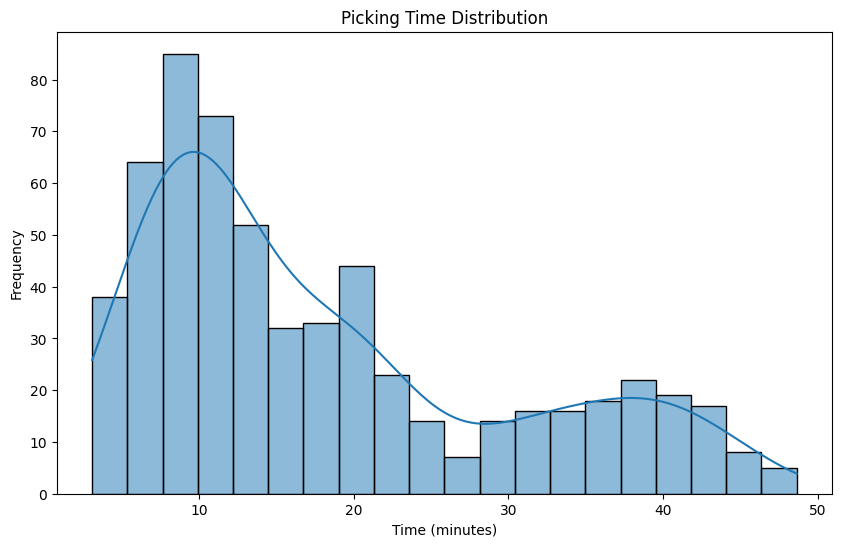

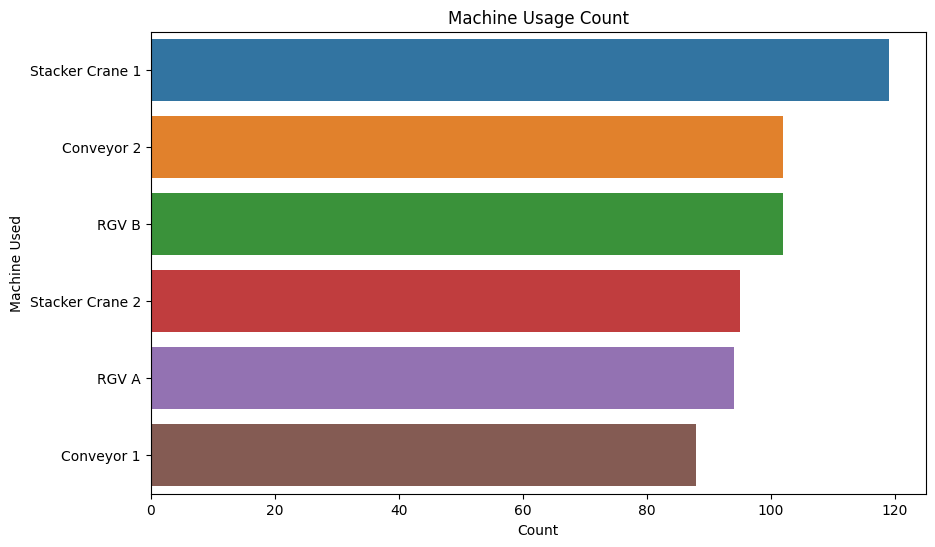

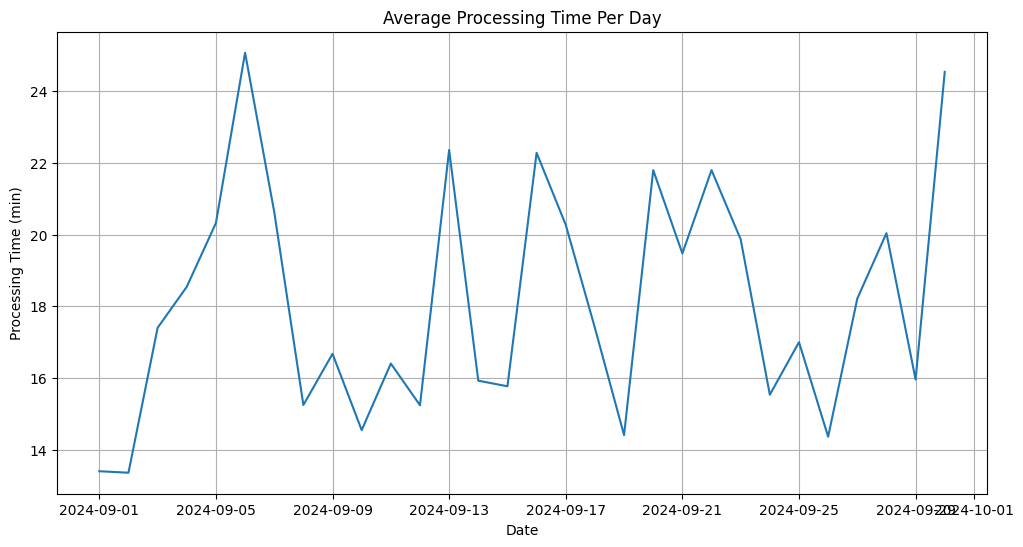

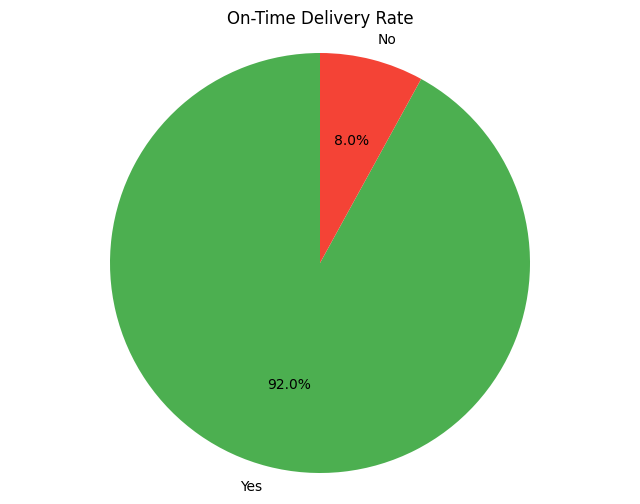

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['picking_time'], bins=20, kde=True)
plt.title("Picking Time Distribution")
plt.xlabel("Time (minutes)")
plt.ylabel("Frequency")
plt.show()


### 📌 2. Bar Chart: Machine Usage
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='machine_used', order=df['machine_used'].value_counts().index)
plt.title("Machine Usage Count")
plt.xlabel("Count")
plt.ylabel("Machine Used")
plt.show()

### 📌 3. Line Chart: Daily Average Processing Time
daily_avg = df.groupby('date_received')['processing_time'].mean()

plt.figure(figsize=(12,6))
daily_avg.plot(kind='line')
plt.title("Average Processing Time Per Day")
plt.xlabel("Date")
plt.ylabel("Processing Time (min)")
plt.grid(True)
plt.show()


### 📌 4. Pie Chart: On-Time Delivery Rate
on_time_data = df['on_time_delivery'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(on_time_data, labels=on_time_data.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50','#F44336'])
plt.title("On-Time Delivery Rate")
plt.axis('equal')
plt.show()